In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import optperfprofpy

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [94]:
problems = pd.Series([1, 1, 2, 2, 3, 3], dtype=int, name='problem')
methods = pd.Series(['A', 'B', 'A', 'B', 'A', 'B'], dtype=str, name='method')
objective_vals = pd.Series([2, 20, 25, 5, 30, 4], dtype=float, name='obj')

In [95]:
example_df = pd.DataFrame([problems, methods, objective_vals]).T

Number of problems per solver:  3


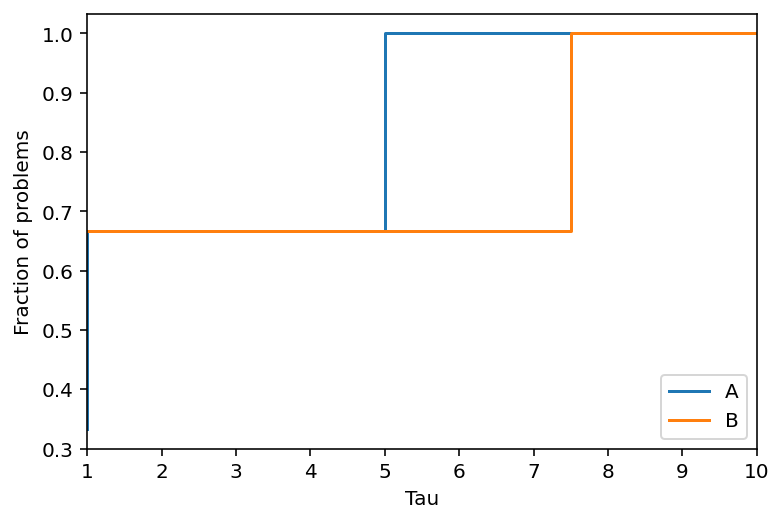

In [96]:
taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    example_df, ['problem'], ['obj'], ['method'])
optperfprofpy.draw_simple_pp(taus, solver_vals, solvers)

In [106]:
def my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles.pdf"):
    """Simple step plotter for performance profiles.
    Parameters
    ----------
    taus : numpy.ndarray
        x values of plot.
    solver_vals : numpy.ndarray
        y values of plot.
    solvers : list
        Labels of curves.
    """

    # Add lines individually to support labels
    for n, solver in enumerate(solvers):
        ax.step(taus, solver_vals[n, :], alpha=0.5, label=solver)

    plt.legend(loc=4)
    plt.xlim(1, taus.max())
    #ax.set_xscale("log")
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\rho_{s}(\tau)$")

    plt.savefig(fname, bbox_inches='tight')
    plt.plot()

Number of problems per solver:  12


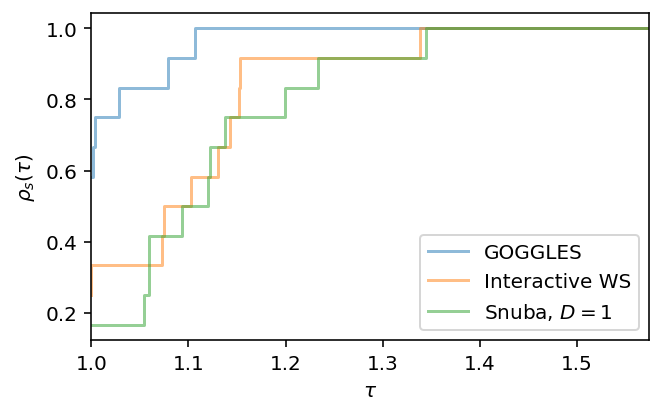

In [107]:
problems = pd.Series(
        np.arange(12).tolist() + \
        np.arange(12).tolist() + \
        np.arange(12).tolist(),
        # np.arange(12).tolist(), 
        dtype=int, name='problem')
methods = pd.Series(
        [r'GOGGLES'] * 12 + \
        [r'Snuba, $D=1$'] * 12 + \
        [r'Interactive WS'] * 12, 
        # [r'Supervised'] * 12, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles_search.pdf")

Number of problems per solver:  9


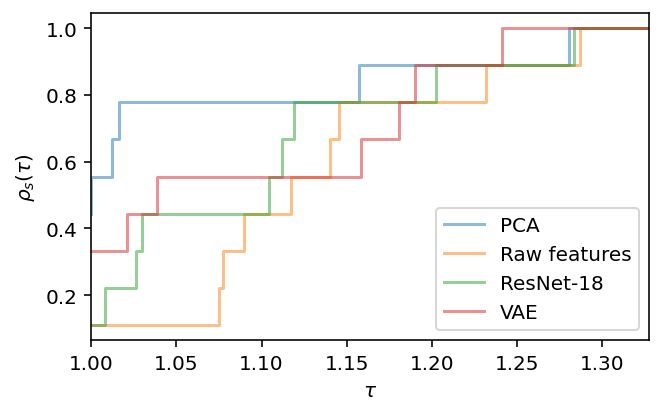

In [108]:
problems = pd.Series(
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * 3 + \
        [r'PCA'] * 3 + \
        [r'ResNet-18'] * 3 + \
        [r'VAE'] * 3) * 3, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles_emb.pdf")

In [109]:
df

,problem,method,obj
0,0,Raw features,0.6367
1,1,Raw features,0.5387
2,2,Raw features,0.7719
3,0,PCA,0.5559
4,1,PCA,0.5476
5,2,PCA,0.7049
6,0,ResNet-18,0.7154
7,1,ResNet-18,0.6635
8,2,ResNet-18,0.781
9,0,VAE,0.712


In [149]:
def my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles.pdf"):
    """Simple step plotter for performance profiles.
    Parameters
    ----------
    taus : numpy.ndarray
        x values of plot.
    solver_vals : numpy.ndarray
        y values of plot.
    solvers : list
        Labels of curves.
    """

    # Add lines individually to support labels
    for n, solver in enumerate(solvers):
        ax.step(taus, solver_vals[n, :], alpha=0.5, label=solver)

    ax.legend(loc=4)
    ax.set_xlim(1, taus.max())
    #ax.set_xscale("log")
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\rho_{s}(\tau)$")


In [150]:


#axs[0]

Number of problems per solver:  12
Number of problems per solver:  9


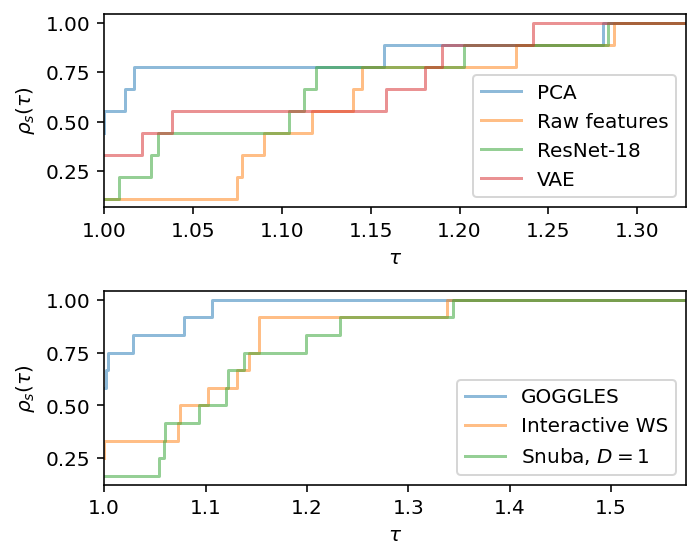

In [159]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4))

problems = pd.Series(
        np.arange(12).tolist() + \
        np.arange(12).tolist() + \
        np.arange(12).tolist(),
        # np.arange(12).tolist(), 
        dtype=int, name='problem')
methods = pd.Series(
        [r'GOGGLES'] * 12 + \
        [r'Snuba, $D=1$'] * 12 + \
        [r'Interactive WS'] * 12, 
        # [r'Supervised'] * 12, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(taus, solver_vals, solvers, axs[1])






problems = pd.Series(
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * 3 + \
        [r'PCA'] * 3 + \
        [r'ResNet-18'] * 3 + \
        [r'VAE'] * 3) * 3, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

my_draw_simple_pp(taus, solver_vals, solvers, axs[0])



plt.tight_layout()
plt.savefig("performance_profiles.pdf")
plt.show()
